# Task 1 - Data Preparation
For this task, you will perform the following steps:
- Load all the necessary packages for this exercise
- Load the data
- Split the data into input features and the target variable
- Split the data into training and validation datasets

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import pandas as pd
import numpy as np

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for train-validation split
from sklearn.model_selection import train_test_split

# Import methods for building decision trees
from sklearn.tree import DecisionTreeClassifier

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import suitable performance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score

In [2]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
teadata = pd.read_csv('MLTeaInc_DT.csv')
teadata.head(2)

,Gender_Male,Gender_Female,Married_Yes,Married_No,Income,Age,Preference
0,0,1,0,1,31779,46,Sweetened
1,1,0,1,0,32739,50,Sweetened


Mapping the Preferences to integer for easy diagnonsis.
- 1 = Unsweetened
- 0 = Sweetened

In [4]:
mappings = {
    'Sweetened': 0,
    'Unsweetened': 1,
}

In [5]:
teadata['Preference_str'] = teadata['Preference']

In [6]:
teadata['Preference'] = teadata['Preference'].replace(mappings)

### Splitting the data.

In [9]:
# Split the data into input features and the target variable
# Note: The target variable here is the 'Preference' feature
# Note: The class 'Unsweetened' is the class of interest or the positive class in this exercise
X = teadata.iloc[:, :-2]
y = teadata['Preference']

In [10]:
# Split the data into training, validation and testing datasets using the 'train_test_split()' method
# Hint: Study the documentation of the 'train_test_split()' method
# Note: Use 'test_size = 0.5' and 'random_state = 0'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state = 0)

# Task 2 - Building Classification Trees
For this task, you will perform the following steps:
- Build and analyze a basic decision tree model without any pruning
- Build and analyze a decision tree model pruned using the *ccp_alpha* parameter

## Sub-task 1 - Decision Tree Model 1
For this sub-task, you will perform the following steps:
- Build a basic decision tree model without pruning
- Visualize the confusion matrix for the training and validation sets

In [11]:
# Train a decision tree without any pruning on the training data using the 'DecisionTreeClassifier()' method
# Hint: Study the documentation of the 'DecisionTreeClassifier()' method
# Note: Use 'random_state = 0'
DT1 = DecisionTreeClassifier(random_state = 0)
DT1 = DT1.fit(X_train, y_train)

In [12]:
# Print the number of leaves and the depth of the tree for 'DT1' using the 'get_n_leaves()' and the 'get_depth()' methods
# Hint: Study the documentations of the 'get_n_leaves()' and the 'get_depth()' methods
DT1_n_leaves = DT1.get_n_leaves()
DT1_depth = DT1.get_depth()
print('Number of leaves =', DT1_n_leaves)
print('Tree depth =', DT1_depth)

Number of leaves = 12
Tree depth = 7


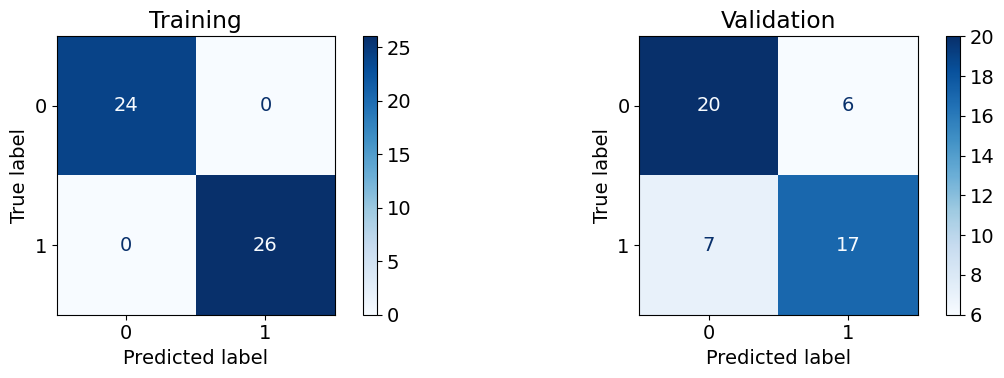

In [13]:
# Display the confusion matrices for 'DT1' on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(DT1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(DT1, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation')
plt.tight_layout();

## Sub-task 2 - Decision Tree Model 2
For this sub-task, you will perform the following steps:
- Build a pruned decision tree using the *ccp_alpha* hyperparameter
- Visualize the confusion matrix for the training and validation sets

In [14]:
# Obtain the cost complexity pruning path information from 'DT1' using the 'cost_complexity_pruning_path()' method
# Hint: Study the documentation of the 'cost_complexity_pruning_path()' method
path = DT1.cost_complexity_pruning_path(X_train, y_train)

# Obtain the list of cost complexity alpha values from the path
# Hint: Study the 'path' object and look for the 'ccp_alphas' attribute
ccp_alpha_values = path.ccp_alphas

# Create an empty list to store the tree models for each cost complexity alpha value
DTs = []

# Fit a decision tree model for each value of cost complexity alpha
for ccp_alpha_value in ccp_alpha_values:

    # Fit a tree model on the training data with the current cost complexity value using the 'DecisionTreeClassifier()' method
    # Hint: The parameter 'ccp_alpha' needs to be set to the current cost complexity alpha value
    # Note: Use 'random_state = 0'
    curr_DT = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha_value)
    curr_DT = curr_DT.fit(X_train, y_train)

    # Add the model to the list of models
    DTs.append(curr_DT)

In [16]:
# Create an empty list to store the accuracy values for the trees in 'DTs' for the training and validation datasets
train_acc = []
val_acc = []

# Obtain training and validation accuracies for each tree in 'DTs'
for DT in DTs:
    # Obtain predicted class labels for the training and validation data using the current tree in 'DTs' using the 'predict()' method
    y_train_pred = DT.predict(X_train)
    y_val_pred = DT.predict(X_val)

    # Compute and append the accuracy values for the training and validation datasets to the lists
    # Hint: Study the documentation of the 'accuracy_score()' method
    train_acc.append(accuracy_score(y_train_pred, y_train))
    val_acc.append(accuracy_score(y_val_pred, y_val))

# Print the value of the cost complexity parameter for which the validation accuracy is the highest
# Hint: Obtain the index of the list 'val_acc' where the value of 'val_acc' is the highest
# Hint: Use this index value to obtain the value of the corresponding cost complexity from the list 'ccp_alpha_values'
best_ccp_alpha = ccp_alpha_values[val_acc.index(max(val_acc))]
print('Best CCP alpha: ', best_ccp_alpha)

Best CCP alpha:  0.021333333333333336


In [18]:
# Train a decision tree on the training data using the 'DecisionTreeClassifier()' method with the best 'ccp_alpha' value
# Hint: The parameter 'ccp_alpha' needs to be set to 'best_ccp_alpha'
# Note: Use 'random_state = 0'
DT2 = DecisionTreeClassifier(random_state = 0, ccp_alpha = best_ccp_alpha)
DT2 = DT2.fit(X_train, y_train)

In [19]:
# Print the number of leaves and the depth of the tree for 'DT2' using the 'get_n_leaves()' and the 'get_depth()' methods
# Hint: Study the documentations of the 'get_n_leaves()' and the 'get_depth()' methods
DT2_n_leaves = DT2.get_n_leaves()
DT2_depth = DT2.get_depth()
print('Number of leaves =', DT2_n_leaves)
print('Tree depth =', DT2_depth)

Number of leaves = 7
Tree depth = 4


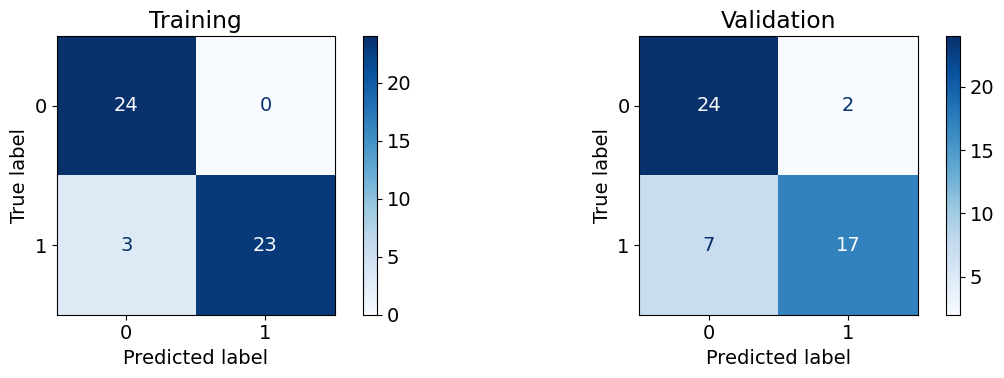

In [20]:
# Display the confusion matrices for 'DT2' on the training and validation data
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(DT2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(DT2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation')
plt.tight_layout();

# Task 3 - Comparing the Models
For this task, you will perform the following steps:
- Compare various classification performance metrics for the two models that you have built

In [22]:
# Calculate and print various classification performance measures for the two models on the training and validation data
# Hint: You will need to obtain the predicted class labels for each of the two models using the 'predict()' method
# Hint: You will need to obtain the predicted probabilities for each of the two models using the 'predict_proba()' method

# Hint: Study the documentations of the different peformance metrics methods
# Note: For F1 score, specify the 'pos_label' parameter as 'Unsweetened'

# Compute predicted probabilities and class labels for each of the models on the training and validation data
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains the positive class probabilities

train_probabilities_1 = DT1.predict_proba(X_train)[:, :1]
val_probabilities_1 = DT1.predict_proba(X_val)[:, :1]
train_y_pred_1 = DT1.predict(X_train)
val_y_pred_1 = DT1.predict(X_val)

train_probabilities_2 = DT2.predict_proba(X_train)[:, :1]
val_probabilities_2 = DT2.predict_proba(X_val)[:, :1]
train_y_pred_2 = DT2.predict(X_train)
val_y_pred_2 = DT2.predict(X_val)

# Use the predicted class labels to compute the following performance metrics

# Compute the accuracies
train_acc_1 = accuracy_score(y_train, train_y_pred_1)
val_acc_1 = accuracy_score(y_val, val_y_pred_1)
train_acc_2 = accuracy_score(y_train, train_y_pred_2)
val_acc_2 = accuracy_score(y_val, val_y_pred_2)

# Compute the F1 scores
train_f1_1 = f1_score(y_train, train_y_pred_1)
val_f1_1 = f1_score(y_val, val_y_pred_1)
train_f1_2 = f1_score(y_train, train_y_pred_2)
val_f1_2 = f1_score(y_val, val_y_pred_2)

# Use the predicted probabilities to compute the ROC AUC scores

# Compute the ROC AUC scores
train_auc_1 = roc_auc_score(y_train, train_y_pred_1)
val_auc_1 = roc_auc_score(y_val, val_y_pred_1)
train_auc_2 = roc_auc_score(y_train, train_y_pred_2)
val_auc_2 = roc_auc_score(y_val, val_y_pred_2)

# Summarize the above metrics for all four models using a single data frame and display it
modelcompare = pd.DataFrame(data = {'Training Accuracy': [train_acc_1, train_acc_2],
                                    'Validation Accuracy': [val_acc_1, val_acc_2],
                                    'Training F1 Score': [train_f1_1, train_f1_2],
                                    'Validation F1 Score': [val_f1_1, val_f1_2],
                                    'Training ROC AUC Score': [train_auc_1, train_auc_2],
                                    'Validation ROC AUC Score': [val_auc_1, val_auc_2]},
                            index = ['DT1', 'DT2'])

modelcompare

,Training Accuracy,Validation Accuracy,Training F1 Score,Validation F1 Score,Training ROC AUC Score,Validation ROC AUC Score
DT1,1.00,0.74,1.000000,0.723404,1.000000,0.738782
DT2,0.94,0.82,0.938776,0.790698,0.942308,0.815705


# Task 4 - Misclassification Costs of Suitable Model
For this task, you will perform the following steps:
- Select a model based on their classification performance measures
- Compute the baseline misclassification cost
- Obtain the best misclassification cost and the associated cut-off from the training data
- Compute the potentially best misclassification cost of the model using the validation data

Note: Suppose that the problem statement requires that your classification model satisfies the following conditions:
- The absolute value of the difference between the training and the validation accuracies is less than 0.2
- The validation accuracy is greater than 0.7
- The absolute value of the difference between the training and the validation ROC AUC scores is less than 0.2
- The validation ROC AUC score is greater than 0.7
- The validation F1 score is greater than 0.7

In [28]:
cond_1 = np.abs(modelcompare['Training Accuracy'] - modelcompare['Validation Accuracy']) < 0.2
cond_2 = modelcompare['Validation Accuracy'] > 0.7
cond_3 = np.abs(modelcompare['Training ROC AUC Score'] - modelcompare['Validation ROC AUC Score']) < 0.2
cond_4 = modelcompare['Validation ROC AUC Score'] > 0.7
cond_5 = modelcompare['Validation F1 Score'] > 0.7

In [29]:
# Using the conditions on the performance measures, select the better model
# Hint: Use the 'modelcompare' data frame that you created to obtain the name of the best model
best_model_name = modelcompare[
    cond_1 & cond_2 & cond_3 & cond_4 & cond_5
].index[0]

print('The model better suited to the conditions of the problem statement is "{}".'.format(best_model_name))

The model better suited to the conditions of the problem statement is "DT2".


In [30]:
# Declare the cost of false positives and false negatives
# Note: The model will be used to send invitations to customers who potentially prefer unsweetened tea for a reveal party
# Note: The cost of false positives and false negatives are provided to you for this exercise
# Note: Labeling a customer who prefers sweetened tea as 'Unsweetened' leads to just sending a wrong invitation, so its cost is less
# Note: Labeling a customer who prefers unsweetened tea as 'Sweetened' leads to losing out on a potential customer, so its cost is more
fp_cost = 300
fn_cost = 1000

In [32]:
# Calculate the misclassification cost for the naive model on the training and the validation data
# Hint: The naive model in this case would classify everyone as preferring unsweetened tea or class 'Unsweetened'
# Hint: That means all class 'Unsweetened' people are classified as class 'Unsweetened' accurately
# Hint: The class 'Sweetened' people are the only ones that contribute to the misclassification
# Hint: So, you need to count how many 'y_train' and 'y_val' values are actually class 'Sweetened', since all of them are labeled as class 'Unsweetened'
# Hint: Recall the formula for the misclassification cost
train_mc_cost_0 = y_train[y_train == 0].count() *  fn_cost
val_mc_cost_0 = y_val[y_val == 0].count() *  fn_cost

print('The misclassification cost of classifying everyone in the training data as preferring unsweetened tea = {} dollars'.format(train_mc_cost_0))
print('The misclassification cost of classifying everyone in the validation data as preferring unsweetened tea = {} dollars'.format(val_mc_cost_0))

The misclassification cost of classifying everyone in the training data as preferring unsweetened tea = 24000 dollars
The misclassification cost of classifying everyone in the validation data as preferring unsweetened tea = 26000 dollars


In [36]:
train_prabilities = DT2.predict_proba(X_train)[:, :1]
val_prabilities = DT2.predict_proba(X_val)[:, :1]

In [38]:
# Generate a list of misclassification costs for various cut-off values for the selected tree model on the training and the validation data
# Hint: If the 'train_probabilities' or the 'val_probabilities' value is greater than the cut-off, then the label is class 'Unsweetened', else it's class 'Sweetened'
# Hint: Try using the 'np.where()' method to obtain the predictions for each cut-off value
# Hint: Study the documentation of the 'confusion_matrix()' method to obtain the false positive and false negative counts
# Hint: Recall the formula for the misclassification cost
train_mc_cost = []
val_mc_cost = []
cutoffs = np.arange(0, 1, 0.01)
for cutoff in cutoffs:
    train_y_pred = np.where(train_prabilities > cutoff, 1, 0)
    train_curr_cf = confusion_matrix(y_train, train_y_pred)
    train_fp_count = train_curr_cf[0, 1]
    train_fn_count = train_curr_cf[1, 0]
    train_mc_cost_current = train_fp_count * fp_cost + train_fn_count * fn_cost
    train_mc_cost.append(train_mc_cost_current)
    
    val_y_pred = np.where(val_prabilities > cutoff, 1, 0)
    val_curr_cf = confusion_matrix(y_val, val_y_pred)
    val_fp_count = val_curr_cf[0, 1]
    val_fn_count = val_curr_cf[1, 0]
    val_mc_cost_current = val_fp_count * fp_cost + val_fn_count * fn_cost
    val_mc_cost.append(val_mc_cost_current)

In [39]:
# Use the cut-off associated with the minimum misclassification cost on the training data to get the best cost for the validation data
# Hint: The expected best misclassification cost on the validation data is the cost associated with the best cut-off from the training data
# Note: The best cut-off for the training data is the cut-off associated with the minimum misclassification cost for the training data
val_best_cost = min(val_mc_cost)

print('Best misclassification cost on the validation data for the model = {} dollars'.format(val_best_cost))

Best misclassification cost on the validation data for the model = 24200 dollars


In [ ]:
training_best_cost = min(training_mc_cost)

print('Best misclassification cost on the trainingidation data for the model = {} dollars'.format(training_best_cost))